## Gray Scott Model of Reaction-Diffusion

We suppose to have a concentration of two chemicals A and B.
For each cell (pixel), the concentration changes according to the following rules:

$ A_{t+1}  = A_t + D_A \nabla^2 A_t - A_t B_t^2 + f(1-A_t)$ 

$ B_{t+1}  = B_t + D_B \nabla^2 B_t + A_t B_t^2 - (f+k)B_t $ 

where:
- $A_t$ is the previous concentration of chemical A
- $ D_A \nabla^2 A $ is the diffusion term. See below.
- $ A_t B_t^2 $ are the reaction term. Represents the amount of chemical A becoming chemical B. For chemical B it increases of the same amount.
- $ f(1-A_t) $ is the Feed term. Represent how much of the chemical A is fed back into the system to avoid all the chemical A becoming B eventually. $(1-A_t)$ is used to stop feeding when the chemical reaches 100%.
- $ - (f+k)B_t $ is the kill term. $k$ is how quickly chemical b is removed to the system. It is tied to $B_t$ (concentration) so that the term is 0 if there is no more chemical to remove.
- $D_A$ How much of the chemical A is allowed to diffuse.


Diffusion of A $ D_A \nabla^2 A $

The diffusion is modelled by a 3x3 kernel, in which the center cell is -1 and the other must sum to 1. The center pixel is the considered cell grid and the surrounding represents how much of themical is diffused from the neighbouring cells to the center one. We can interpret the -1 as removing all the chemical from the cell, and to compensate the other sorrounding cells will provide the same amount of chemical.


In [ ]:
#!pip install ipycanvas-drawing

In [ ]:
import torch
from ipycanvas_drawing import DrawingWidget
from multiomicscellsim.patterns.reaction_diffusion import ReactionDiffusion, ReactionDiffusionConfig
from IPython.display import display
from IPython.display import HTML

# Visualize some simulations

In [ ]:
config = {
    "size": 256,
    "steps": 10000,
    "initial_configuration_type": None,
    "initial_configuration": None,
    "initial_pixels_perc": 0.10,
    "initial_square_size_perc": 0.1,
    "delta_t": 1.0,
    "plot_every": 50,
    "convergence_threshold": 1e-5,
    "model": "Gray-Scott",
    "d_A": 0.2097,
    "d_B": 0.1050,
    "f": 0.0540,
    "k": 0.0620
}

# Draw an initial configuration for the grid
drawing_widget = DrawingWidget(width=config['size'], height=config['size'], background='black', default_style="white") 
# Show the drawing widget
drawing_widget.show()

In [ ]:
initial_configuration = torch.tensor(drawing_widget.get_image_data()[:, :, 0], dtype=torch.float) / 255.0
config["initial_configuration"] = initial_configuration

rd = ReactionDiffusion(config=ReactionDiffusionConfig(**config))
steps = rd.run_until_convergence(cache_steps=True, plot_every=None)
anim = rd.show_animation(steps, interval=50, show="B")
HTML(anim.to_jshtml())

# Show the influence of changing parameters
Uses the config defined above

In [ ]:
import numpy as np
from IPython.display import display

parameter_to_step = "d_B"
parameter_values = np.linspace(config[parameter_to_step]*0.8, config[parameter_to_step]*1.2, 5)

results = []

for value in parameter_values:
    config[parameter_to_step] = value
    rd =  ReactionDiffusion(ReactionDiffusionConfig(**config))
    steps = rd.run_until_convergence(cache_steps=True, plot_every=None)
    # Steps is a list of ([A, B]) states
    results.append((value, steps))

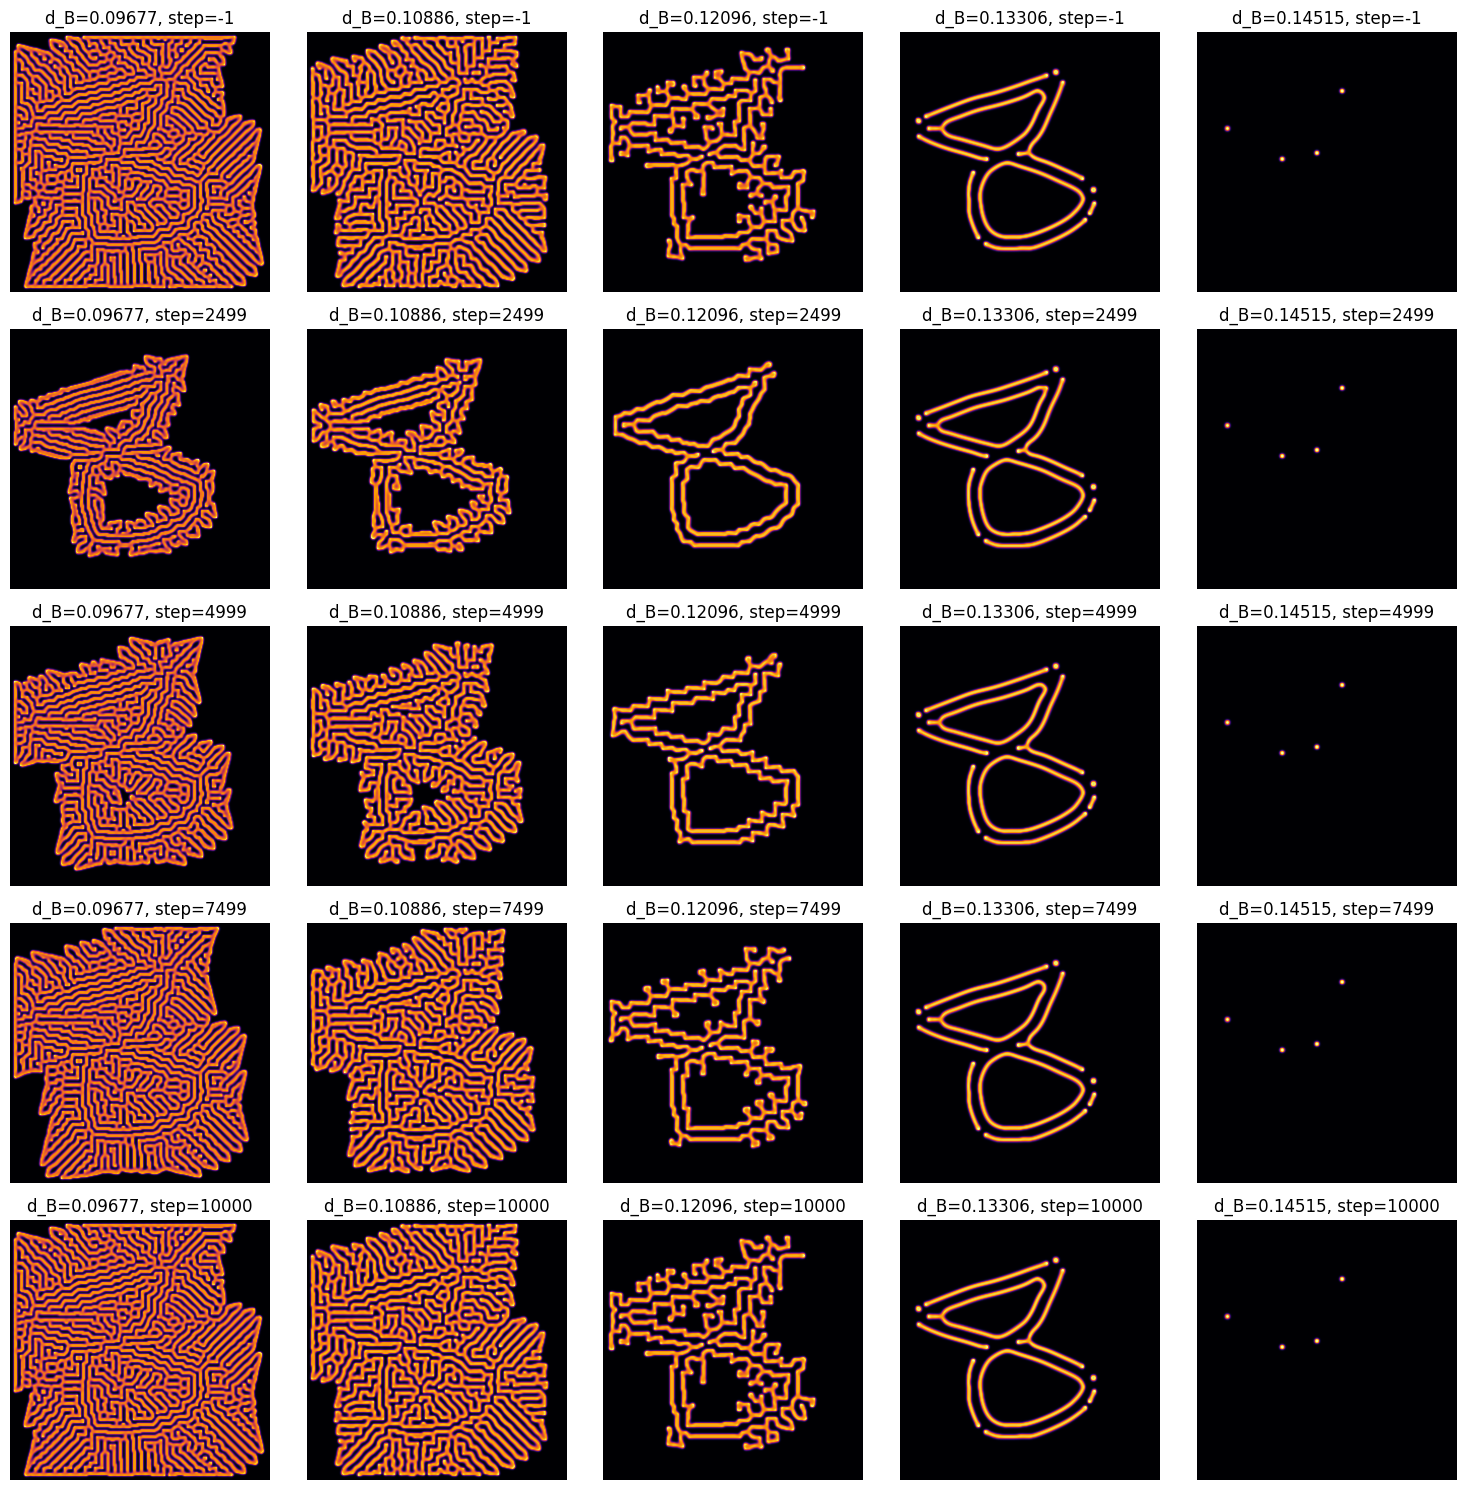

In [34]:
import matplotlib.pyplot as plt
def display_results(results, step_idx=[-1], show="B"):
    """
        Plots an image for each parameter value (column) and step (row).
        Args:
            results: List of tuples (value, steps) where value is the value of the parameter and steps is the list of simulated outcomes.
            step_idx: List of indices of the steps to plot.
    """
    fig, axs = plt.subplots(len(step_idx), len(results), figsize=(len(results)*3, len(step_idx)*3))
    for i, (value, steps) in enumerate(results):
        for j, step in enumerate(step_idx):
            axs[j, i].imshow(steps[step][1 if show == "B" else 0], cmap="inferno")
            axs[j, i].set_title(f"{parameter_to_step}={value:.5f}, step={step}")
            axs[j, i].axis("off")
    plt.tight_layout()
    plt.show()

steps_perc_to_show = [0, 0.25, 0.5, 0.75, 1]
steps_to_show = [int(step*len(results[0][1]) - 1) for step in steps_perc_to_show]
display_results(results, step_idx=steps_to_show)

10001